# Week 1: Applied Machine Learning - Classification
## Import required modules and load data file

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
fruits = pd.read_table('assets/fruit_data_with_colors.txt')

In [3]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


`mass`, `width`, `height`, `color_score` are features

`color_score` is a color spectrum scale where: 
* Red [0.85, 1.00]
* Orange [0.75, 0.85)
* Yellow [0.65, 0.75)
* Green [0.45, 0.65)

Goal: build a classifier from the `fruits` data that can predict the correct type of fruit for an given observation of features

classifier needs to work well on any future observation that isn't in our training set

## Create Training and Test Sets
X is usually a 2D array or DataFrame. y is usually a 1D array or scalar

`random_state` parameter provides a seed value to the function's internal random number generator. Choosing different seed randomizes the split.

Default for `train_test_split` is 75% training, 25% test

Use `X_train` to train the classifier, `X_test` to evaluate the classifier's performance after training

In [4]:
X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [5]:
X_train.shape

(44, 4)

In [6]:
X_test.shape

(15, 4)

In [7]:
y_train.shape

(44,)

In [8]:
y_test.shape

(15,)

## Examining the Data
Good idea to look at dataset and do EDA before applying ML to see what cleaning/preprocessing needs to be done.

Things to look at:
* distribution of values per feature >> outliers/noise or missing feature
* missing values
* incorrect units of measurements (weight in grams vs kilograms)
* not enough examples of a class

Sometimes ML isn't always needed.

Visualization helps you see range of values AND how likely a ML algorithm can predict different classes by seeing how well-clustered and -separated the different types of objects are in the **feature space**, which is the representation of an object using specific features.

### Feature Pair Plot
shows all possible combos of features with a scatter plot and histograms on the diagonal

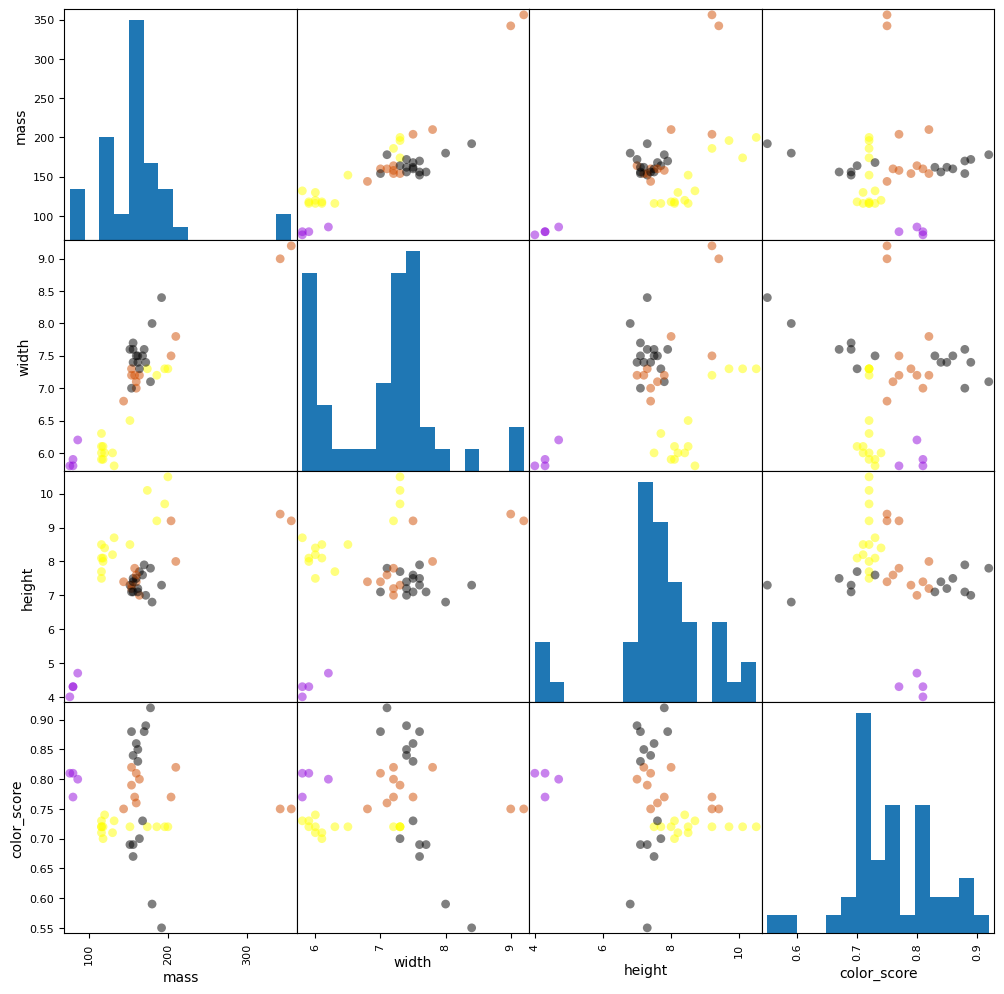

In [9]:
from matplotlib import cm
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(12,12), cmap=cmap)

### 3D Feature Scatterplot

In [10]:
from mpl_toolkits.mplot3d import Axes3D

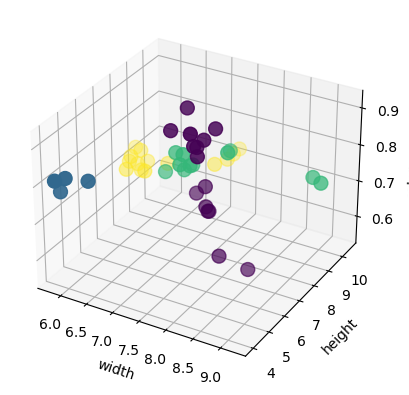

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c=y_train, marker='o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

## Prediction Task - Train Classifier
### Definition and Background
**K Nearest Neighbors**: an instance-/memory-based supervised learning model which works by memorizing the labeled examples they seen in the training set and classiifying the new objects later.

K = the number of closest neighbors used to classify an observation

Decision boundary: the line that separates two different classes in feature space equidistantly

The distance between points can be calculated in several ways:
* ordinary Euclidean distance function: places equal weight between features; the line between the decision boundary and the line between 2 points would be perpendicular to each other.
* weight Euclidean distance function: diff features diff weights (may improve accuracy); 

KNN is sensitive to features that have values on very different scales >> should normalize training data before fitting to ensure all features are on same scale

A Nearest Neighbors Algorithm needs:
1. a distance metric to define what 'distance' means in our feature space; how to properly select nearby neighbors (eg Eucliean distance, which is really Minkowski with p=2)
2. How many neighbors to use
3. Optional weighting function to give some neighbors more influence on the outcome than others
4. once we have labels of nearby points, we need a way to combine them to produce a final prediction (eg use the mode/simple majority vote)

### Application in Python with Fruit dataset
Classify new fruits

Make a dictionary to convert the numeric output of a classifier prediction to something a human can more easily interpret:

In [12]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

Define the feature space (ignoring `color_score` for now):

In [13]:
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Create classifier object:

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

Train the classifier (fit the estimator) using the training data:

In [15]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In scikit-learn, all estimators have a `fit()` method that takes the training data and then changes the state of the classifier/estimator obkect to enable prediction once the training completes. It updates the state of `knn` variable to memorize the labels in the training data.

Estimate the accuracy of classifier on future data using the test data:

In [16]:
knn.score(X_test, y_test)

0.5333333333333333

Interpretation: 53.33% of the fruits in the test set were correctly predicted by the classifier

Use the trained kNN classifier model to classify new, previously unseen objects at the individual-level:

In [17]:
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [19]:
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

Plot the decision boundaries of the kNN classifier:

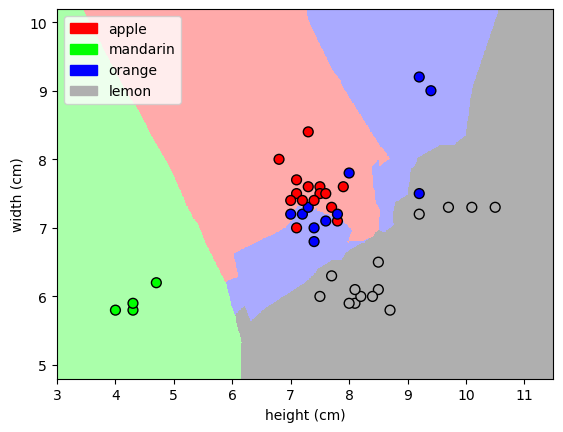

In [20]:
from adspy_shared_utilities import plot_fruit_knn

plot_fruit_knn(X_train, y_train, 5, 'uniform') # equal weight; use 'distance' instead of 'uniform' to try distance-weighted method

### Varying K Value
A small K value (k=1) will be sensitive to noise, outliers, mislabeled data, and other sources of variation in individual data points. As seen with the fragmented decision boundaries.

For larger values of K (k=10), the areas assigned to different classes are smoother and more robust to noise in individual points because the model suppresses the effects of noisy individual labels/outliers but may generalize too much

Where **Bias-Variance Tradeoff** comes into play >> more next week

Sensitivity of K w.r.t classification accuracy

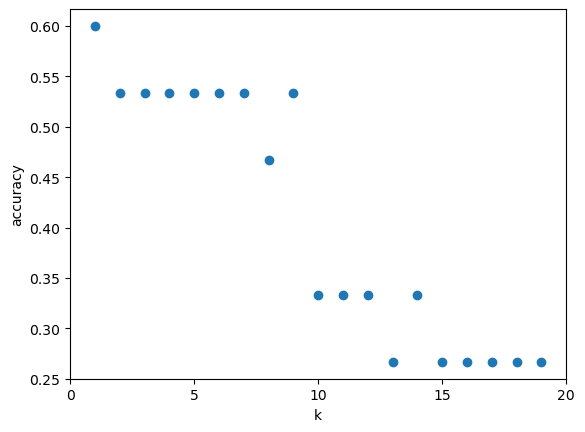

In [22]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
    
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

Interpretation: the larger the k value, the worse the model performs

*Note: results are for this particular train-test split*

To get more reliable estimates of likely future accuracy for a particular k value, we would want to look over several train-test splits